# Native Bay Area Plant Classifier

In [1]:
from fastai.vision import *

### Download images from URLs

In [2]:
classes = ['Baccharis pilularis', 'Artemesia californica', 'Rosa californica']

Execute the following step for each of the csv files containing image URLS.

In [3]:
# download_images('data/baccharis.csv', 'data/baccharis', max_pics=200)

In [4]:
verify_images('data/baccharis', delete=True, max_size=500)

#### View some of the photos

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder('data/', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['artemesia', 'baccharis', 'rosa']

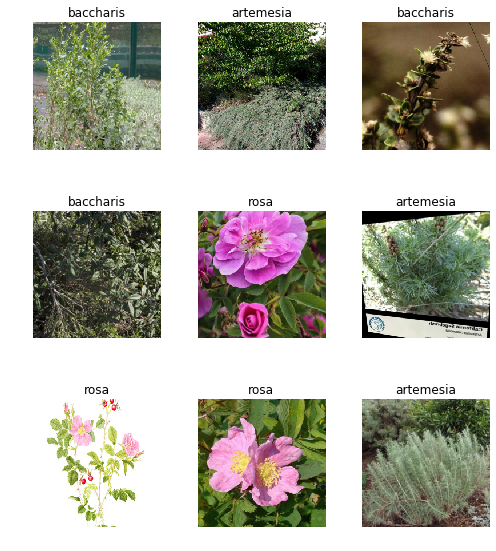

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['artemesia', 'baccharis', 'rosa'], 3, 442, 110)

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.252663,0.858639,0.372727
2,0.915213,0.544021,0.227273
3,0.748020,0.436374,0.136364
4,0.641182,0.420302,0.118182


In [ ]:
# learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


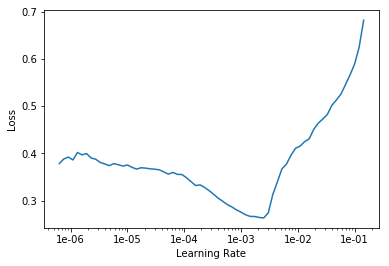

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(15, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate
1,0.395454,0.401647,0.100000
2,0.345992,0.381046,0.100000
3,0.337682,0.357863,0.100000
4,0.308891,0.334041,0.109091
5,0.285121,0.324548,0.081818
6,0.248874,0.309580,0.090909
7,0.217551,0.272228,0.100000
8,0.187623,0.216917,0.072727
9,0.165642,0.293254,0.100000
10,0.143282,0.404336,0.118182


In [ ]:
# learn.save('stage-2')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
from fastai.widgets import *

In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

## Put the model in use

In [ ]:
learn.export()

In [ ]:
defaults.device = torch.device('cpu')

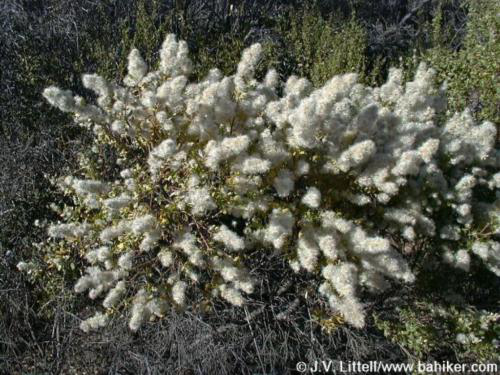

In [17]:
img = open_image('data/baccharis/00000016.jpg')
img

In [4]:
learn = load_learner('data')

In [20]:
outputs = learn.predict(img)
outputs

(Category baccharis, tensor(1), tensor([0.3732, 0.4415, 0.1854]))

In [40]:
str('{:.1f}'.format(max(outputs[2]).item() * 100))

'44.1'

IndexError: invalid index of a 0-dim tensor. Use tensor.item() to convert a 0-dim tensor to a Python number